In [10]:
from analysis.stock_52_weeks import *
from plot_chart import *
from analysis.technical_indicator import *
from analysis.top_20_stocks import *
from krx_wr_script import *
from analysis.bot_strategy import *
from datetime import datetime, timedelta, date
from util import *
import pandas as pd
from pykrx import stock
import matplotlib.pyplot as plt
from finta import TA
import yfinance as yf

util_m = util()

## Function: `pykrx_scratch()`
- Crawling all KOSPI& KOSDAQ stocks from KRX
- Save [open, high, low, close, volume] of each stock as .csv file

In [ ]:
# Pykrx scratch Test...
pykrx_scratch(date_Start=util_m.from_date, 
              date_End=util_m.today_date, 
              Krx_Char_folder_path='./Krx_Chart_folder') # KOSPI & KOSDAQ all stock scratch

## Function: `pykrx_read_csv()`
- Read .csv file of stocks 

In [5]:
# pykrx_daily_update(util_m.Krx_Char_folder_path) # Today update
util_m.stock_name = '카카오'
stock_csv = pykrx_read_csv(stock_name = util_m.stock_name, 
                           Krx_Char_folder_path = './Krx_Chart_folder')

stock_csv

,date,open,high,low,close,volume
0,2019-01-02,20774,21075,20372,20473,173462
1,2019-01-03,20573,21175,20172,20573,293989
2,2019-01-04,20473,20874,20372,20774,251728
3,2019-01-07,21073,21474,20472,20673,378153
4,2019-01-08,20571,20671,19970,20051,450462
...,...,...,...,...,...,...
602,2021-06-10,130000,135000,129500,133500,5564011
603,2021-06-11,134500,136500,132000,135500,3674400
604,2021-06-14,136000,143000,136000,142500,6240394
605,2021-06-15,143500,144500,140500,144500,4950329


## Function: `cal_technical_indicator_high_class()`
- Add [UO, TRIX, MOM] informations to .csv file for technical analysis
    - UO: Ultimate oscillator
    - TRIX: Triple exponential smoothed moving average
    - MOM: Month on month

In [8]:
 # technical indicator high class
stock_csv = cal_technical_indicator_high_class(stock_name = util_m.stock_name, 
                                               path = './Krx_Chart_folder')

stock_csv

,date,open,high,low,close,volume,uo,trix,mom
0,2019-01-02,20774,21075,20372,20473,173462,NaN,NaN,NaN
1,2019-01-03,20573,21175,20172,20573,293989,NaN,0.067322,NaN
2,2019-01-04,20473,20874,20372,20774,251728,NaN,0.092568,NaN
3,2019-01-07,21073,21474,20472,20673,378153,NaN,0.079315,NaN
4,2019-01-08,20571,20671,19970,20051,450462,NaN,0.030605,NaN
...,...,...,...,...,...,...,...,...,...
602,2021-06-10,130000,135000,129500,133500,5564011,57.153098,0.368288,8500.0
603,2021-06-11,134500,136500,132000,135500,3674400,63.026063,0.373673,13500.0
604,2021-06-14,136000,143000,136000,142500,6240394,70.768368,0.381794,19500.0
605,2021-06-15,143500,144500,140500,144500,4950329,76.510667,0.392375,17500.0


## Function: `cal_technical_indicator_name()`
- Add [EMA, BB, RSI] informations to .csv file for technical analysis
    - EMA: Exponential moving average
    - BB: Bollinger Bands
    - RSI: Relative strength index

In [11]:
# Base technical indicator
stock_csv = cal_technical_indicator_name(stock_name = util_m.stock_name, 
                                         path = './Krx_Chart_folder')

stock_csv

,date,open,high,low,close,volume,ema7,ema50,ema99,upper_band,lower_band,rsi
0,2019-01-02,20774,21075,20372,20473,173462,20473.000000,20473.000000,20473.000000,NaN,NaN,NaN
1,2019-01-03,20573,21175,20172,20573,293989,20530.142857,20524.000000,20523.505051,NaN,NaN,100.000000
2,2019-01-04,20473,20874,20372,20774,251728,20635.594595,20610.688442,20608.695824,NaN,NaN,100.000000
3,2019-01-07,21073,21474,20472,20673,378153,20649.274286,20627.213213,20625.262268,NaN,NaN,72.985071
4,2019-01-08,20571,20671,19970,20051,450462,20453.169014,20502.570588,20505.722919,NaN,NaN,26.143894
...,...,...,...,...,...,...,...,...,...,...,...,...
602,2021-06-10,130000,135000,129500,133500,5564011,128165.183510,116070.881073,107003.483228,135320.745291,106479.254709,73.804114
603,2021-06-11,134500,136500,132000,135500,3674400,129998.887632,116832.807305,107573.416423,136976.937935,107423.062065,75.689706
604,2021-06-14,136000,143000,136000,142500,6240394,133124.165724,117839.363882,108271.951530,139894.314001,107855.685999,80.877775
605,2021-06-15,143500,144500,140500,144500,4950329,135968.124293,118884.879024,108996.515991,142789.666330,108360.333670,82.056059


## Function: `plot_technical_indicators()`
- Create plot w.r.t the technical indicators

No handles with labels found to put in legend.
<ipython-input-17-353de44af31e>:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/home/jaehyun/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 52852 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jaehyun/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50724 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jaehyun/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 52852 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/jaehyun/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 50724 missing from current font.
  font.set_text(s, 0, flags=flags)


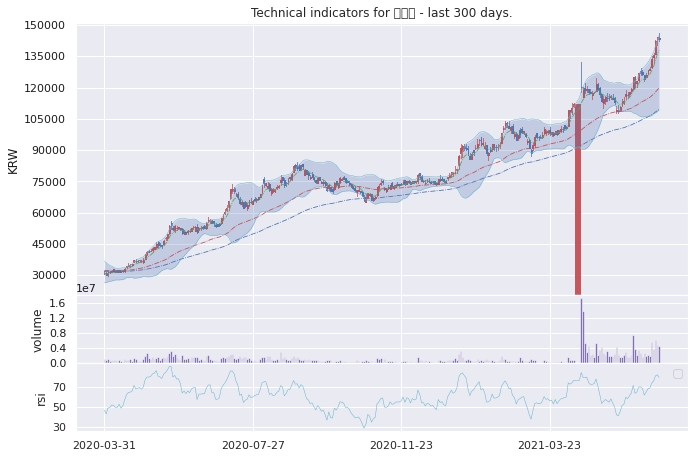

In [17]:
plt.rcParams['figure.figsize'] = (10,7)
fig = plot_technical_indicators(name=util_m.stock_name, 
                                dataset=stock_csv, 
                                last_days=300)
fig.show()

## Function: `stock_52w_gap_percentage()`
- Get the gap between the highest price in the past year and the current price

In [17]:
# 52 weeks high price test...
one_year_ago = datetime.now() - timedelta(days=365) # Calculate when was a year ago
gap_percentage, high_price_52w = stock_52w_gap_percentage(stock_name=util_m.stock_name, 
                                                          one_year_ago=one_year_ago,
                                                          Krx_Char_folder_path='./Krx_Chart_folder')
print(f"* The gap (%) of {util_m.stock_name} >>> {gap_percentage:.3f} %")
print(f"* The highest price (KRW) of {util_m.stock_name} >>> {high_price_52w:,} KRW")

* The gap (%) of 대신증권우 >>> 94.444 %
* The highest price (KRW) of 대신증권우 >>> 18,000 KRW


## Create 

In [18]:
base_date = date.today().strftime("%Y-%m-%d") 

results_52w_csv = f"results/this_year/52_weeks_analysis_{base_date}.csv"
if not os.path.exists(results_52w_csv):
    # Hit the high in 52 weeks until today
    print(f"{base_date} - 52 weeks high update for analysis ...")
    time.sleep(0.5)
    df_52w_csv = stock_52w_update(path='./Krx_Chart_folder', 
                                  date=base_date)

    # Hit the high in 52 weeks before 2021/01/01 (base year)
    base_52w_csv = base_year_high_52_weeks(df_52w_csv, util_m.base_year, base_date)
else:
    print(f'File is existed in results/this_year {base_date}')
    df_52w_csv = pd.read_csv(results_52w_csv)

df_52w_csv

2021-06-16 - 52 weeks high update for analysis ...


100%|██████████| 2409/2409 [00:11<00:00, 207.07it/s]


,stock,date,gap,high
1235,우리로,2021-03-17,0.5236,1920
1877,가비아,2020-07-10,0.5236,19200
435,하이골드3호,2021-06-14,0.5450,1845
943,쌍용C&E,2021-06-08,0.5855,8590
1742,CJ ENM,2021-01-26,0.6362,174000
...,...,...,...,...
2026,GV,2020-09-11,427.0833,1265
1474,센트럴인사이트,2020-11-11,464.2570,14050
616,맥스로텍,2020-10-07,519.1117,4600
1199,피에이치씨,2020-09-09,553.3333,9800
